In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_digits()
x = data.images
y = data.target

In [3]:
x = x.reshape((x.shape[0], 8 ,8 ,1))
x = x.astype('float32')/255
y = to_categorical(y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [5]:
model=Sequential()
model.add((Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1))))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
earlystop=EarlyStopping(monitor='val_loss',patience=10)
best_weights=ModelCheckpoint('best_weights.h5',save_best_only=True,monitor='val_loss',mode='min')

In [8]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test),
                  callbacks=[earlystop,best_weights])

Epoch 1/50
45/45 [==============================] - 1s 5ms/step - loss: 2.2884 - accuracy: 0.2136 - val_loss: 2.2701 - val_accuracy: 0.2500
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 2.2285 - accuracy: 0.5240 - val_loss: 2.1746 - val_accuracy: 0.6083
Epoch 3/50
 1/45 [..............................] - ETA: 0s - loss: 2.1784 - accuracy: 0.6562

C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 0s 2ms/step - loss: 2.0728 - accuracy: 0.6026 - val_loss: 1.9304 - val_accuracy: 0.7083
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 1.7722 - accuracy: 0.7022 - val_loss: 1.5678 - val_accuracy: 0.7972
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 1.3994 - accuracy: 0.7808 - val_loss: 1.1934 - val_accuracy: 0.8583
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 1.0728 - accuracy: 0.8323 - val_loss: 0.9107 - val_accuracy: 0.8333
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.8385 - accuracy: 0.8365 - val_loss: 0.7167 - val_accuracy: 0.8556
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.8594 - val_loss: 0.5921 - val_accuracy: 0.8833
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.8866 - val_loss: 0.5093 - val_accuracy: 0.8917
Epoch 10/50
45/45 [============

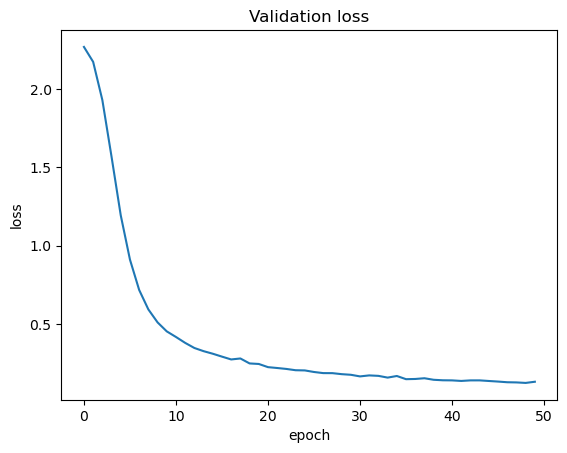

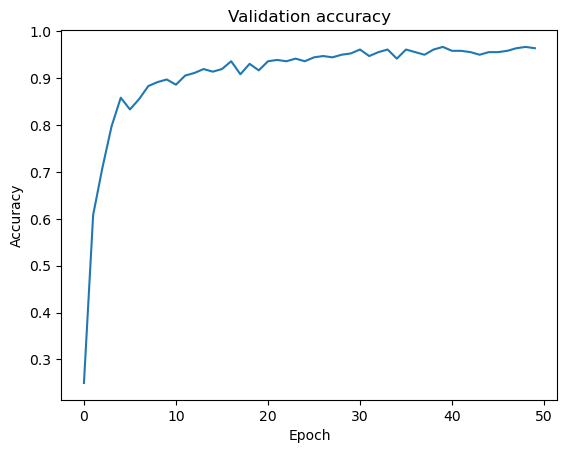

In [9]:
plt.plot(history.history['val_loss'])
plt.title("Validation loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title("Validation accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [10]:
model.load_weights("best_weights.h5")

In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

Test Loss: 0.12236715853214264
Test Accuracy: 0.9666666388511658
